In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
3


In [6]:
# ヒートマップの描画関数
def draw_pcm(partial_corr_matrix):
    plt.figure(figsize=(20, 10))

    ax = sns.heatmap(partial_corr_matrix, 
                annot=True, 
                fmt='g', 
                cmap='Blues', 
                annot_kws={"size":7})

    sns.set(font_scale = 2)

    ax.xaxis.tick_top()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

    plt.savefig('./output/heatmap.png')

In [7]:
df = pd.read_excel('../data/230724_0804_AI用qPCRデータ.xlsx', index_col=0, header=1)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
0,0.000004,2.982088e-05,0.000004,1.512045e-05,0.000015,9.403729e-07,0.000122,0.000015,4.792578e-07,0.000007,...,0.000008,0.000121,1.193258e-07,0.000119,0.000004,0.000008,0.000015,0.000030,0.000015,0.000030
1,0.000008,3.062644e-05,0.000016,2.940716e-08,0.000015,3.847846e-06,0.000124,0.000015,3.848767e-06,0.000015,...,0.000015,0.000123,2.377373e-07,0.000123,0.000008,0.000016,0.000031,0.000061,0.000031,0.000061
2,0.000008,7.608227e-06,0.000016,1.396326e-08,0.000031,9.615077e-07,0.000245,0.000015,4.864569e-07,0.000031,...,0.000015,0.000122,9.666787e-07,0.000122,0.000008,0.000016,0.000062,0.000062,0.000031,0.000062
3,0.000004,1.513944e-05,0.000015,1.225795e-07,0.000015,4.807837e-07,0.000124,0.000015,1.207673e-07,0.000008,...,0.000015,0.000061,2.410427e-07,0.000061,0.000004,0.000008,0.000031,0.000062,0.000031,0.000062
4,0.000008,4.768491e-07,0.000031,6.105349e-08,0.000031,9.593193e-07,0.000124,0.000015,2.428970e-07,0.000016,...,0.000016,0.000124,4.795912e-07,0.000124,0.000008,0.000008,0.000031,0.000062,0.000031,0.000062


In [8]:
# 偏相関行列の計算
partial_corr_matrix = pg.pcorr(df).round(3)
partial_corr_matrix.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
glk,1.000,0.108,0.241,0.322,-0.242,-0.118,-0.141,-0.070,-0.131,-0.105,...,0.237,-0.051,-0.095,-0.191,0.572,0.289,-0.012,0.061,-0.114,-0.121
agp,0.108,1.000,-0.026,0.108,-0.016,0.148,0.386,0.253,0.169,-0.115,...,0.190,0.114,0.267,0.071,-0.087,-0.247,0.032,0.086,0.083,-0.009
yihX,0.241,-0.026,1.000,-0.114,0.183,0.081,0.106,0.178,0.042,0.115,...,0.048,0.025,0.149,-0.101,-0.062,-0.275,0.055,0.106,0.076,-0.186
pgm,0.322,0.108,-0.114,1.000,0.494,0.115,0.174,0.062,0.158,0.160,...,-0.373,0.467,0.278,-0.035,-0.306,-0.299,0.143,-0.060,0.037,-0.085
ptsG,-0.242,-0.016,0.183,0.494,1.000,0.036,-0.040,-0.159,0.168,0.079,...,0.162,-0.194,-0.246,-0.080,0.256,0.095,-0.137,0.064,-0.002,-0.041


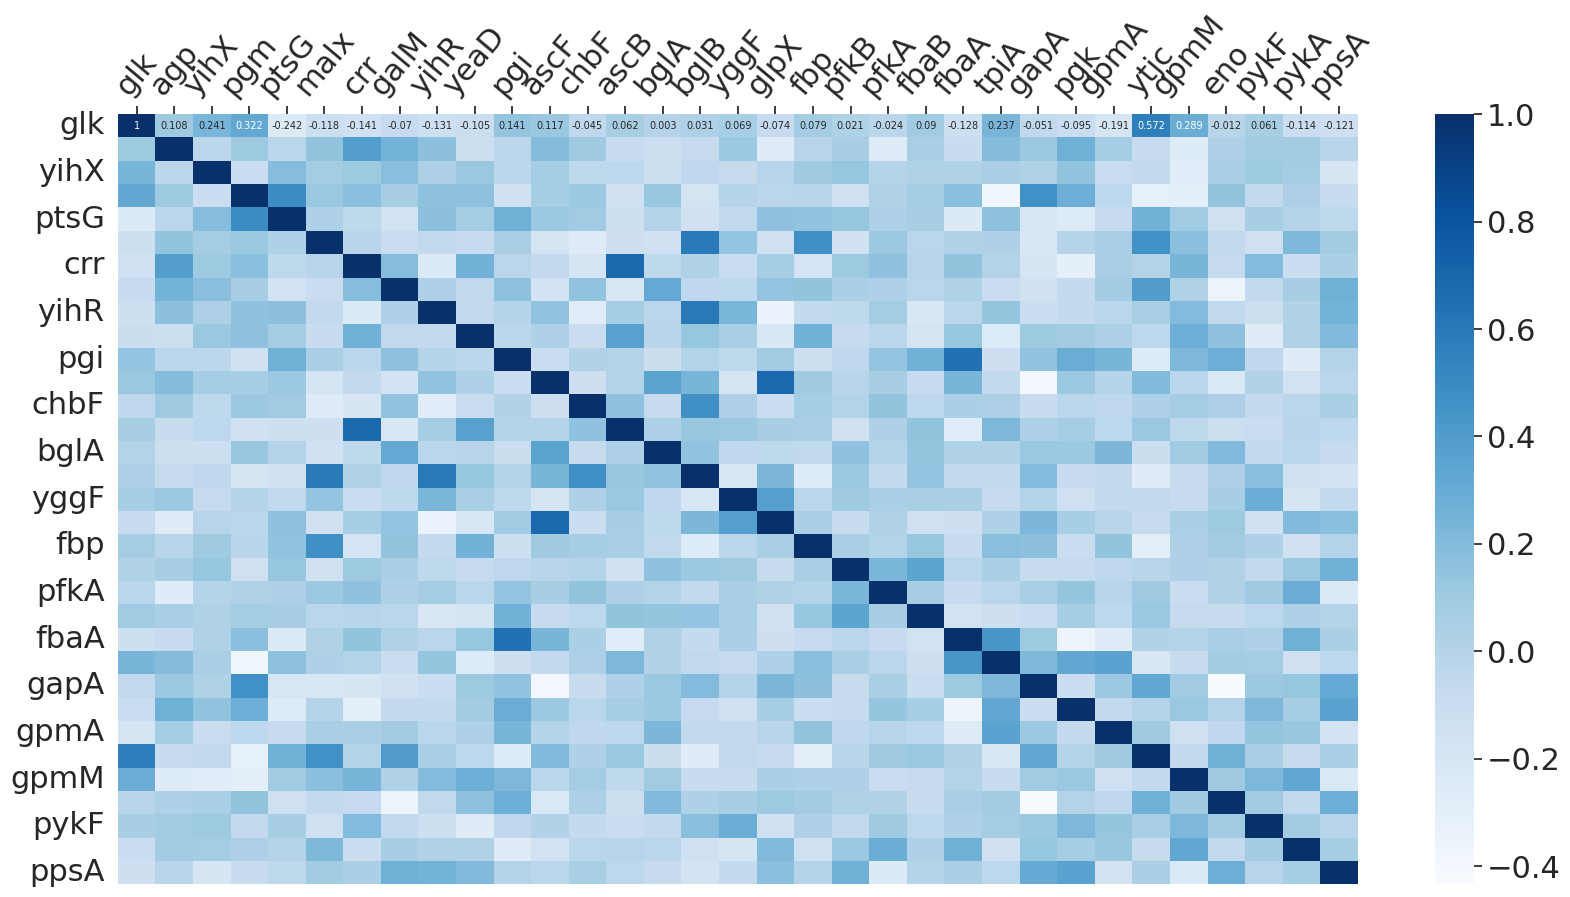

In [12]:
draw_pcm(partial_corr_matrix)

In [13]:
# yとの相関係数を表示
corr_y = pd.DataFrame({"features":df.columns,"corr_y":partial_corr_matrix["ascF"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,glk,0.117000
1,agp,0.189000
2,yihX,0.075000
3,pgm,0.070000
4,ptsG,0.114000
5,malx,-0.176000
6,crr,-0.062000
7,galM,-0.163000
8,yihR,0.154000
9,yeaD,0.028000


In [14]:
# 連続値 →　離散値に変更
df_new = df.copy()

for i in range(len(df_new.columns)):
    df_new.iloc[:, i] = pd.qcut(df_new.iloc[:, i], 5)
    # contingency_table = pd.crosstab(df_new[])

df_new.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
0,"(-0.00099629, 7.73e-06]","(1.53e-05, 3.04e-05]","(-0.00099631, 1.53e-05]","(7.74e-06, 1.53e-05]","(-0.00099613, 1.57e-05]","(-0.000999762, 9.59e-07]","(6.23e-05, 0.000123]","(7.68e-06, 1.52e-05]","(2.46e-07, 4.86e-07]","(3.9e-06, 7.76e-06]",...,"(-0.00099841, 7.71e-06]","(6.18e-05, 0.000123]","(-0.000999881, 6.07e-05]","(6.15e-05, 0.000122]","(-0.000999507, 3.88e-06]","(3.96e-06, 7.79e-06]","(-0.00099685, 3.11e-05]","(-0.0009999846, 6.12e-05]","(-0.000999518, 1.54e-05]","(1.54e-05, 3.09e-05]"
1,"(-0.00099629, 7.73e-06]","(3.04e-05, 3.07e-05]","(1.53e-05, 1.56e-05]","(-0.00099999236, 7.61e-06]","(-0.00099613, 1.57e-05]","(3.84e-06, 7.8e-06]","(0.000123, 0.000124]","(1.53e-05, 1.55e-05]","(9.7e-07, 1.59e-05]","(7.94e-06, 3.1e-05]",...,"(1.54e-05, 1.56e-05]","(0.000123, 0.000125]","(-0.000999881, 6.07e-05]","(0.000122, 0.000123]","(3.88e-06, 7.71e-06]","(7.9e-06, 1.56e-05]","(-0.00099685, 3.11e-05]","(6.12e-05, 6.15e-05]","(3.06e-05, 3.08e-05]","(3.09e-05, 6.18e-05]"
2,"(-0.00099629, 7.73e-06]","(-0.000999523, 1.53e-05]","(1.53e-05, 1.56e-05]","(-0.00099999236, 7.61e-06]","(3.13e-05, 3.16e-05]","(9.59e-07, 1.92e-06]","(0.000125, 0.00398]","(1.52e-05, 1.53e-05]","(4.86e-07, 9.7e-07]","(3.1e-05, 0.000505]",...,"(1.54e-05, 1.56e-05]","(6.18e-05, 0.000123]","(-0.000999881, 6.07e-05]","(0.000122, 0.000123]","(3.88e-06, 7.71e-06]","(7.9e-06, 1.56e-05]","(6.17e-05, 0.000123]","(6.18e-05, 6.26e-05]","(3.08e-05, 3.13e-05]","(6.18e-05, 0.000123]"
3,"(-0.00099629, 7.73e-06]","(-0.000999523, 1.53e-05]","(1.53e-05, 1.56e-05]","(-0.00099999236, 7.61e-06]","(-0.00099613, 1.57e-05]","(-0.000999762, 9.59e-07]","(0.000123, 0.000124]","(1.53e-05, 1.55e-05]","(-0.0009999401, 2.4e-07]","(3.9e-06, 7.76e-06]",...,"(1.54e-05, 1.56e-05]","(-0.0009874, 6.12e-05]","(-0.000999881, 6.07e-05]","(6.11e-05, 6.15e-05]","(-0.000999507, 3.88e-06]","(7.79e-06, 7.9e-06]","(-0.00099685, 3.11e-05]","(6.15e-05, 6.18e-05]","(3.08e-05, 3.13e-05]","(6.18e-05, 0.000123]"
4,"(-0.00099629, 7.73e-06]","(-0.000999523, 1.53e-05]","(3.09e-05, 3.13e-05]","(-0.00099999236, 7.61e-06]","(3.13e-05, 3.16e-05]","(-0.000999762, 9.59e-07]","(0.000124, 0.000125]","(1.53e-05, 1.55e-05]","(2.4e-07, 2.46e-07]","(7.94e-06, 3.1e-05]",...,"(1.56e-05, 3.08e-05]","(0.000123, 0.000125]","(-0.000999881, 6.07e-05]","(0.000123, 0.000496]","(3.88e-06, 7.71e-06]","(7.9e-06, 1.56e-05]","(-0.00099685, 3.11e-05]","(6.18e-05, 6.26e-05]","(3.08e-05, 3.13e-05]","(3.09e-05, 6.18e-05]"


In [15]:
from pgmpy.estimators import PC

pc = PC(df_new)
model = pc.estimate()

/home/yarita/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

In [16]:
from pyvis import network as net
import networkx as nx

edge_list = list(model.edges())
edge_list = [i + tuple([0.1]) for i in edge_list]#ウェイトの値を適当に追加

#jupyter中に表示させる場合、notebook=True, →にする場合directed=True
got_net = net.Network(notebook=True,directed=True)

for e in edge_list:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
    
got_net.show_buttons(True)

got_net.show('./output/gameofthrones.html')

./output/gameofthrones.html
